In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

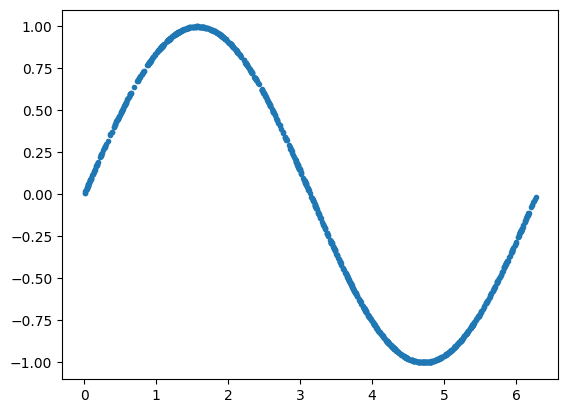

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [8]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output
discriminator = Discriminator()

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [10]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [11]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [12]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.14410804212093353
Epoch: 0 Loss G.: 2.467197895050049
Epoch: 10 Loss D.: 0.550363302230835
Epoch: 10 Loss G.: 1.2499959468841553
Epoch: 20 Loss D.: 0.5956230163574219
Epoch: 20 Loss G.: 1.123353362083435
Epoch: 30 Loss D.: 0.6281862258911133
Epoch: 30 Loss G.: 0.901442289352417
Epoch: 40 Loss D.: 0.6748762130737305
Epoch: 40 Loss G.: 0.8689351081848145
Epoch: 50 Loss D.: 0.6893645524978638
Epoch: 50 Loss G.: 0.7817169427871704
Epoch: 60 Loss D.: 0.6475206613540649
Epoch: 60 Loss G.: 0.833588182926178
Epoch: 70 Loss D.: 0.6513252854347229
Epoch: 70 Loss G.: 0.8435040712356567
Epoch: 80 Loss D.: 0.5811949968338013
Epoch: 80 Loss G.: 1.0008184909820557
Epoch: 90 Loss D.: 0.6795089840888977
Epoch: 90 Loss G.: 1.0206125974655151
Epoch: 100 Loss D.: 0.7437191605567932
Epoch: 100 Loss G.: 0.6472933888435364
Epoch: 110 Loss D.: 0.5286856889724731
Epoch: 110 Loss G.: 1.095922589302063
Epoch: 120 Loss D.: 0.6569765210151672
Epoch: 120 Loss G.: 0.8416709899902344
Epoch: 130 Lo

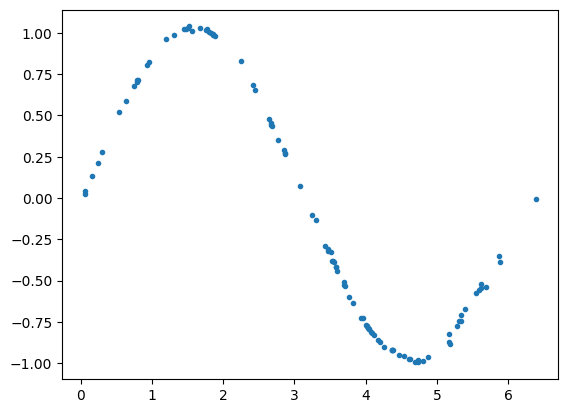

In [13]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

**Handwritten Digits**

In [14]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [15]:
torch.manual_seed(111)

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [17]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

100%|██████████| 9912422/9912422 [00:00<00:00, 87656437.43it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 65585107.65it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23478320.22it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3323539.56it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [18]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

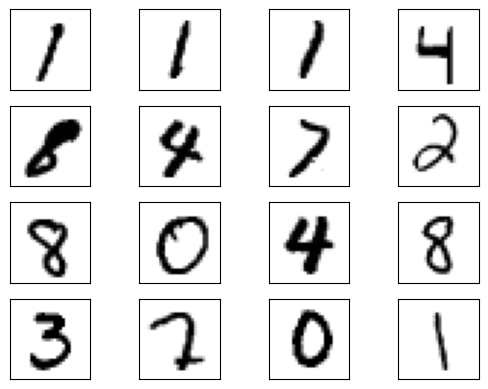

In [19]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [21]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output
discriminator = Discriminator()

In [22]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator()

In [23]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

In [28]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples
        real_samples_labels = torch.ones((batch_size, 1))
        
        latent_space_samples = torch.randn((batch_size, 100))
        
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.7050947546958923
Epoch: 0 Loss G.: 0.689437985420227
Epoch: 1 Loss D.: 0.7071399688720703
Epoch: 1 Loss G.: 0.6889905333518982
Epoch: 2 Loss D.: 0.7053644061088562
Epoch: 2 Loss G.: 0.6884245276451111
Epoch: 3 Loss D.: 0.707557201385498
Epoch: 3 Loss G.: 0.6897108554840088
Epoch: 4 Loss D.: 0.7034955024719238
Epoch: 4 Loss G.: 0.6877710819244385
Epoch: 5 Loss D.: 0.7024464011192322
Epoch: 5 Loss G.: 0.6886910200119019
Epoch: 6 Loss D.: 0.7015208601951599
Epoch: 6 Loss G.: 0.6896875500679016
Epoch: 7 Loss D.: 0.7015900611877441
Epoch: 7 Loss G.: 0.687999963760376
Epoch: 8 Loss D.: 0.7032163143157959
Epoch: 8 Loss G.: 0.6898829936981201
Epoch: 9 Loss D.: 0.6991392374038696
Epoch: 9 Loss G.: 0.688635528087616
Epoch: 10 Loss D.: 0.7055609822273254
Epoch: 10 Loss G.: 0.6900810599327087
Epoch: 11 Loss D.: 0.7035498023033142
Epoch: 11 Loss G.: 0.6882599592208862
Epoch: 12 Loss D.: 0.7015649080276489
Epoch: 12 Loss G.: 0.6888293623924255
Epoch: 13 Loss D.: 0.701247274875640

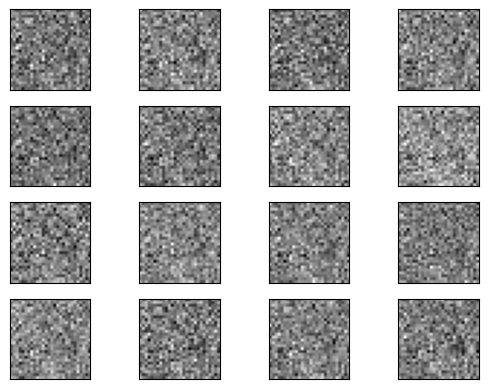

In [30]:
latent_space_samples = torch.randn(batch_size, 100)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])